# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить.

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже.


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже.


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки.

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то:
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается.

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов,
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [1]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [2]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections=50, birth_chance=0.1):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.mode = 1

        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.max_connections = max_connections
        self.birth_chance = birth_chance

        self.consumer_min = consumer_min
        self.consumer_max = consumer_max
        self.consumer_delta = consumer_delta

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []

    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price and \
            (self.mode != 3 or (self.mode == 3 and self.sellers[seller_id].deal_count == 0 and self.consumers[consumer_id].deal_count == 0)):
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            if self.mode == 3:
                self.consumers[consumer_id].count_deal()
            if self.mode == 4 and random.random() < self.birth_chance:
                self.consumers.append(Consumer(self.consumer_min, self.consumer_max, self.consumer_delta))
                self.num_of_consumers += 1

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

            if self.mode == 3:
                self.sellers[seller_id].count_deal()
            

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)

            if self.mode == 2:
                self.randomize_all_limits()

            if self.mode == 3 and _ % self.max_connections == 0:
                self.reset_deal_counts()



    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            #axs[i].set_ylim([0, 1])

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")
            

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph
    
    def randomize_all_limits(self):
        for consumer in self.consumers:
            consumer.randomize_max_price()
        
        for seller in self.sellers:
            seller.randomize_min_price()
    
    def reset_deal_counts(self):
        for consumer in self.consumers:
            consumer.reset_deal_count()
        
        for seller in self.sellers:
            seller.reset_deal_count()


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta
        self.deal_count = 0

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta

    def randomize_max_price(self):
        self.max_price += random.uniform(-0.3, 1)
        self.max_price = max(0, self.max_price)
    
    def count_deal(self):
        self.deal_count += 1
    
    def reset_deal_count(self):
        self.deal_count = 0


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.deal_count = 0

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta
    
    def randomize_min_price(self):
        self.min_price += random.uniform(-0.9, 1)
        self.min_price = max(0, self.min_price)
    
    def count_deal(self):
        self.deal_count += 1
    
    def reset_deal_count(self):
        self.deal_count = 0



## Запуск модели

In [3]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████| 1001/1001 [00:00<00:00, 220347.34it/s]


## Визуализация модели

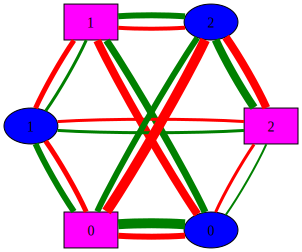

In [4]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

model.plot_graph(100, 200)

## Результаты моделирования

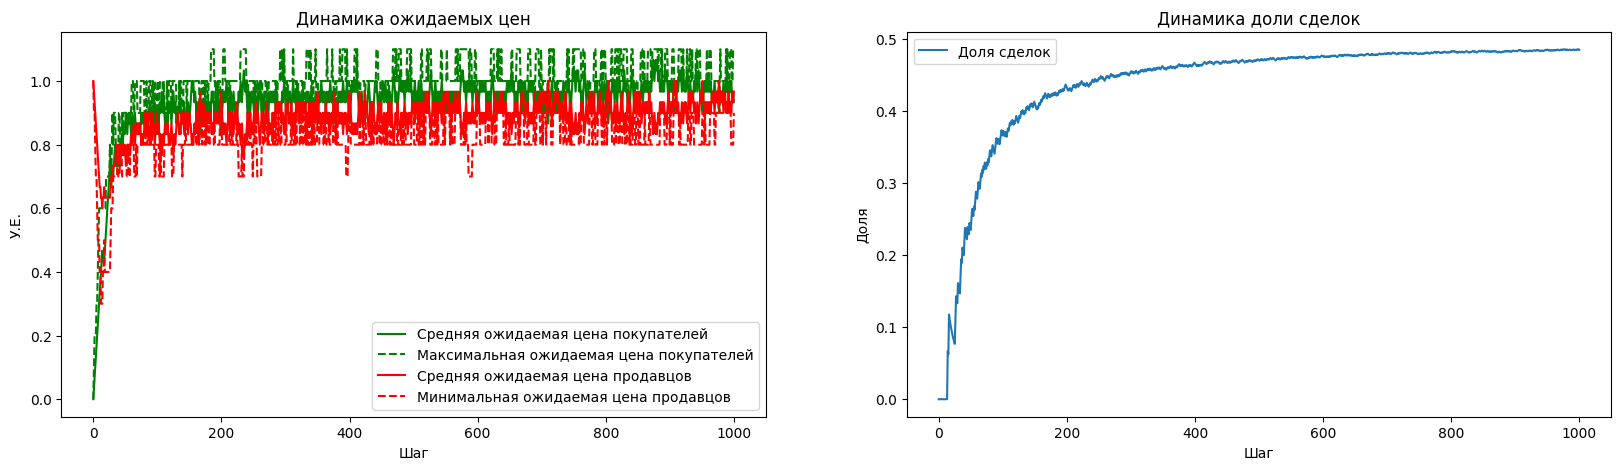

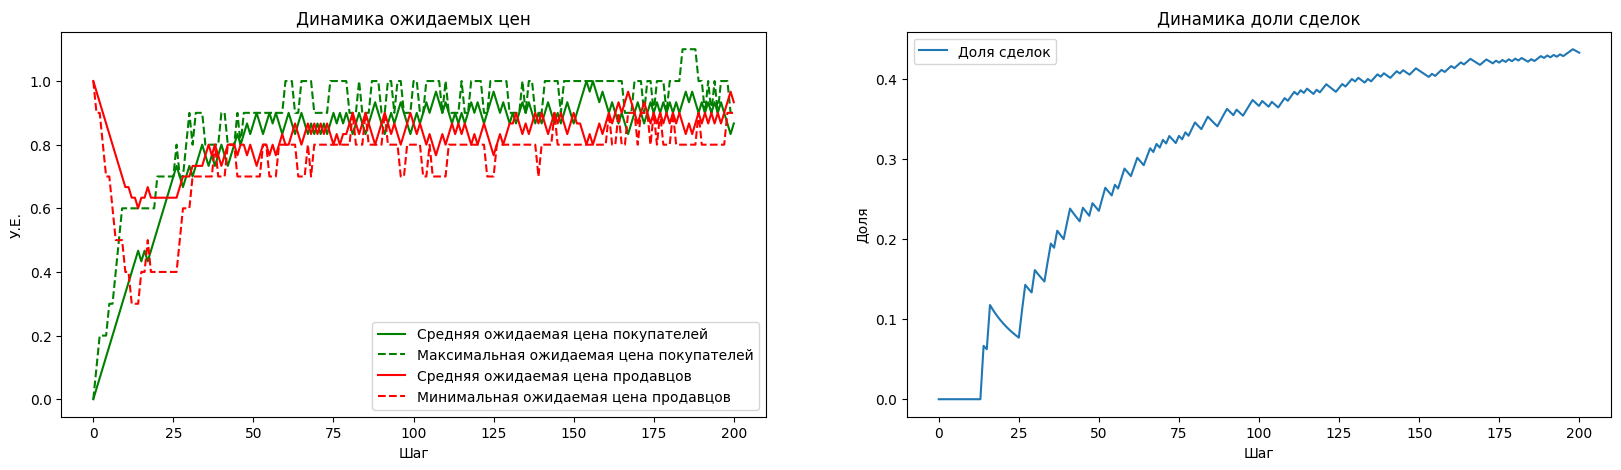

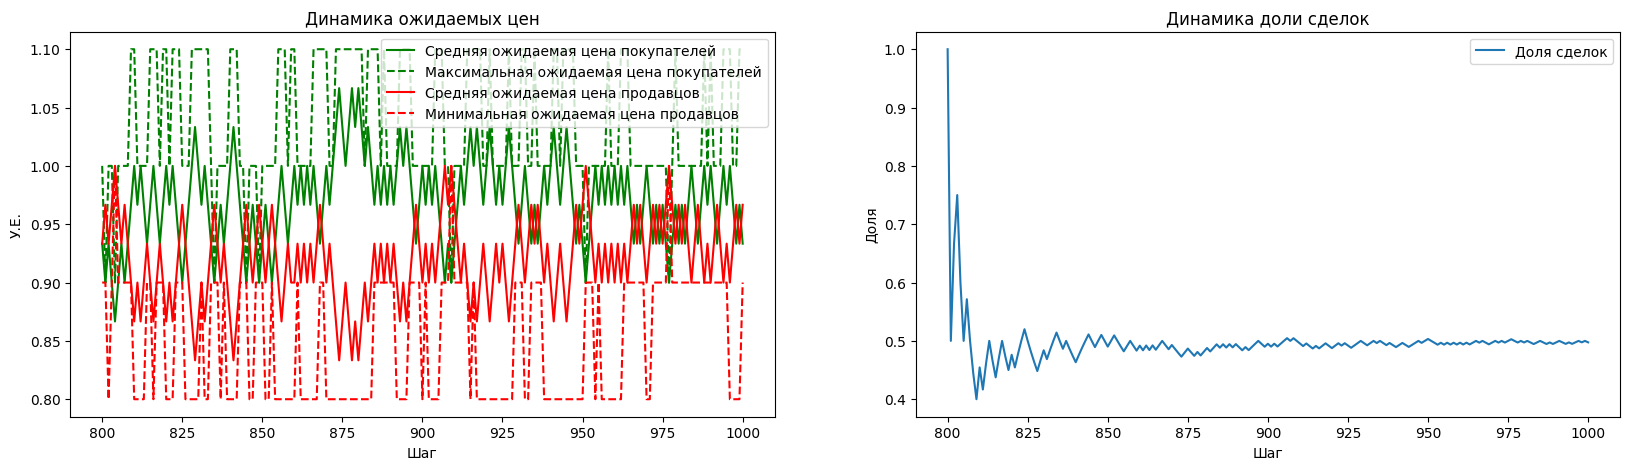

In [5]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

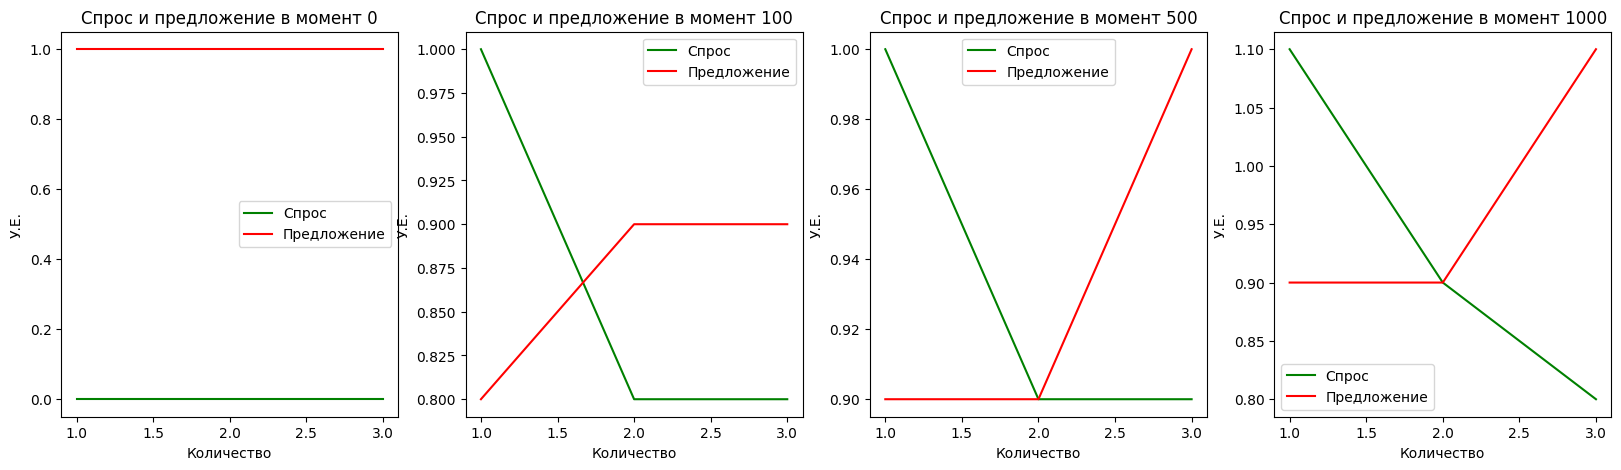

In [6]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень.
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

### Introduction

> **Preamble:** I really disliked the way how the presumed *OOP standards* are followed throughout the lab, so I have decided not to bother too much with the correctness and the convenience of the programming realization and include all modifications in the original class. 

> As for the graph visualizations, I have bundled them all other in an interactive format for my own sake because I love click-y and slider-y thingies, they scratch the itch etched in my brain that nothing else can.

> A cool video of a similar model: https://www.youtube.com/watch?v=PNtKXWNKGN8

In [7]:
from ipywidgets import interact
import ipywidgets as widgets

###############################################################################
# this is a universal visualization that I will use throughout the entire lab #
###############################################################################

# this is the default config that gets used in case we don't pass some specific values
default_config = {
    'num_of_consumers': 3,
    'num_of_sellers': 3,
    'consumer_min': 0,
    'consumer_max': 10,
    'consumer_delta': 0.1,
    'seller_min': 0,
    'seller_max': 10,
    'seller_delta': 0.1,
    'seed': 0,
    'iterations': 1000,
    'from_': 0,
    'to_': 10000,
    'stuff': '0 100 500 1000',
    'max_connections': 50,
    'birth_chance': 0.1
}

# here I am creating a proper function that would make interactive
# visualizations for my own convenience
def run_vis(mode=1, seeded=True, show_graph=True, show_supply=True, config_=None):
    # If no config is passed, use the default
    config = default_config.copy()
    if config_:
        config.update(config_)  # Update config with provided values

    def create_model_dynamics(**kwargs):
        # either preserve randomness or mess around with it
        if seeded:
            random.seed(kwargs.get('seed', config['seed']))
        
        model = Model(
            num_of_consumers=kwargs.get('num_of_consumers', config['num_of_consumers']),
            num_of_sellers=kwargs.get('num_of_sellers', config['num_of_sellers']),
            consumer_min=kwargs.get('consumer_min', config['consumer_min']),
            consumer_max=kwargs.get('consumer_max', config['consumer_max']),
            consumer_delta=kwargs.get('consumer_delta', config['consumer_delta']),
            seller_min=kwargs.get('seller_min', config['seller_min']),
            seller_max=kwargs.get('seller_max', config['seller_max']),
            seller_delta=kwargs.get('seller_delta', config['seller_delta']),
            max_connections=kwargs.get('max_connections', config['max_connections']),
            birth_chance=kwargs.get('birth_chance', config['birth_chance'])
        )

        model.mode = mode

        iterations = kwargs.get('iterations', config['iterations'])
        from_ = kwargs.get('from_', config['from_'])
        to_ = kwargs.get('to_', config['to_'])
        stuff = kwargs.get('stuff', config['stuff'])
        
        model.run(iterations)

        model.plot_dynamics(from_, min(iterations, to_))

        # toggle-able parts that I may not want to show
        if show_graph:
            graph = model.plot_graph(min(from_, iterations), min(iterations, to_))
            display(graphviz.Source(graph.source))

        if show_supply:
            model.plot_supply_and_demand(list(map(int, stuff.split())))

    widgets_dict = {
        'num_of_consumers': widgets.IntSlider(min=1, max=20, step=1, value=config['num_of_consumers']),
        'num_of_sellers': widgets.IntSlider(min=1, max=20, step=1, value=config['num_of_sellers']),
        'consumer_min': widgets.FloatSlider(min=0, max=10, step=0.1, value=config['consumer_min']),
        'consumer_max': widgets.FloatSlider(min=0, max=10, step=0.1, value=config['consumer_max']),
        'consumer_delta': widgets.FloatSlider(min=0, max=1, step=0.1, value=config['consumer_delta']),
        'seller_min': widgets.FloatSlider(min=0, max=10, step=0.1, value=config['seller_min']),
        'seller_max': widgets.FloatSlider(min=0, max=10, step=0.1, value=config['seller_max']),
        'seller_delta': widgets.FloatSlider(min=0, max=1, step=0.1, value=config['seller_delta']),
        'seed': widgets.IntSlider(min=0, max=65535, step=1, value=config['seed']),
        'iterations': widgets.IntSlider(min=1, max=10000, step=1, value=config['iterations']),
        'from_': widgets.IntSlider(min=0, max=10000, step=1, value=config['from_']),
        'to_': widgets.IntSlider(min=0, max=10000, step=1, value=config['to_']),
        'stuff': widgets.Text(value=config['stuff'], placeholder="Enter values:", description='Iterations:'),
        'max_connections': widgets.IntSlider(min=0, max=1000, step=1, value=config['max_connections']),
        'birth_chance': widgets.FloatSlider(min=0, max=1, step=0.01, value=config['birth_chance']),
    }
    
    # removing unnecessary widgets if the mode does not require them
    if mode != 3:
        widgets_dict.pop('max_connections', None)
    
    if mode != 4:
        widgets_dict.pop('birth_chance', None)
    
    if not show_supply:
        widgets_dict.pop('stuff', None)

    interact(create_model_dynamics, **widgets_dict)

run_vis()
    

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

In this simulation, we approach a certain equilibrium around which deals would happen. If our starter values are reasonable (there is a sufficient number of sellers and consumers, the deltas are small enough, the price expectations are compatible, etc), then we would first approach this equilibrium with barely, if any, deals, and then level out around a certain value.

### Observation 1: Expected prices fall in a certain interval

In [8]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 1,
        'num_of_sellers': 1,
        'iterations': 300
    }
)

interactive(children=(IntSlider(value=1, description='num_of_consumers', max=20, min=1), IntSlider(value=1, de…

Let's try to mitigate the effect of randomness in our model. For this, we have taken a single producer and a single consumer who can find a common ground. It can be very clearly seen that there are peaks and troughs oscillating around the convergence point. This happens because we have constant deltas.

More specifically, the moment a deal is reached, both agents increase their profit expectations, instantly going out of bounds of what they would be satisfied with. This leads to them decreasing their profit expectations next iteration, which leads to a deal being made, and so forth indefinitely.

Let's bring back the randomness and see that the same trend can be observed. Although it would be less consistent, there is still a clear convergence point.

In [9]:
run_vis(
    show_supply=False,
)

# generally, I suggest to drag the /seed/ slider around to make sure that the trends aren't flukes

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

### Observation 2: The proportion of deals approaches a certain constant level

In this model not all consumers and sellers can match, but some always can, so this leads to them eventually levelling out at a third of successful deals, which can further be seen on the graph.

In this case, $\frac{2}{3}$ of all pairs could theoretically be a match, and due to the oscillation described above, half of that value would be a successful deal.

In [10]:
run_vis(
    show_supply=False,
    config_ = {
        'seed': 1,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

Case for when all sellers can match with all consumers leads to the proportion of successful deals levelling out at $0.5$, which is the maximum proportion due to the nature of oscillation.

In [11]:
run_vis(
    show_supply=False,
    config_ = {
        'consumer_min': 5,
        'consumer_max': 9,
        'seller_min': 3,
        'seller_max': 6,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

Case for when only two pairs can physically match leads to an even smaller value.

In [12]:
run_vis(
    show_supply=False,
    config_ = {
        'seed': 45020,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

In this case, no pairs can match.

In [13]:
run_vis(
    show_supply=False,
    config_ = {
        'seed': 21607,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

### Observation 3: Rates of convergence depend on the number of sellers and consumers and the price increase deltas


For obvious reasons, the more agents there are, the longer it takes for an equilibrium to materialize. (The obvious reason is the fact that iterations are required for more people.)

Similarly for deltas, the smaller the steps are, the longer it would take to eventually reach an equilibrium since larger steps mean a higher convergence speed and a smaller number of failed steps until the initial point.

Let's consider the case for many agents:

In [14]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 20,
        'num_of_sellers': 20,
        'iterations': 10000,
        'seed': 1
    }
)

interactive(children=(IntSlider(value=20, description='num_of_consumers', max=20, min=1), IntSlider(value=20, …

As we may observe, the case above took approximately a thousand iterations in order to **reach a single deal**! Let's look at the case for a smaller number of agents once again:

In [15]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 10,
        'num_of_sellers': 10,
        'iterations': 10000,
        'seed': 1
    }
)

interactive(children=(IntSlider(value=10, description='num_of_consumers', max=20, min=1), IntSlider(value=10, …

It is evident that the first deal is reached around $2$ times faster for the case with $10$ consumers and sellers in relation to $20$.

Let's now run this exact simulation again, but with increased deltas.

In [16]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 10,
        'num_of_sellers': 10,
        'consumer_delta': 0.5,
        'seller_delta': 0.5,
        'iterations': 10000,
        'seed': 1
    }
)

interactive(children=(IntSlider(value=10, description='num_of_consumers', max=20, min=1), IntSlider(value=10, …

Voila! A considerably faster rate of convergence is reached whenever deltas are larger.

### Observation 4: Temporal characteristics of connection diagrams

In [17]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'seed': 1,
        'iterations': 2500,
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

As we have partially been able to observe above, we may outline three steps in our simulation.

1. No deals are made and all sellers and consumers are constantly in-/de-creasing their expectations toward some equilibrium.
2. More and more agents who can realistically have a match are slowly beginning to reach deals as well.
3. No new agents are having successful deals, so there is a constant onslaught of deals between the very same agents on the market.  

#### Case 1

No deals are currently being made, which is denoted by only red lines being present in the graph.

In [18]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'seed': 1,
        'iterations': 2500,
        'to_': 250
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

#### Case 2

We are seeing some green lines appearing, not all of them are thick, though.

In [19]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'seed': 1,
        'iterations': 2500,
        'from_': 251,
        'to_': 800
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

#### Case 3

Thicker green lines denote the fact there is a very clear, well-established tendency for successful deals between agents.

In [20]:
run_vis(
    show_supply=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'seed': 1,
        'iterations': 2500,
        'from_': 801,
        'to_': 2500
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

---

Each iteration, I will add a random value $\lambda$ in the interval $\lambda\in[-0.9, 1]$ to max/min acceptable prices of both sellers and consumers. The interval selection will provide a degree of unpredictability in the market, whereas its mathematical expectation being positive at $0.05$ effectively simulates real-world inflation.

To achieve this, the following methods introduced into the original classes above were used:

* `Consumer.randomize_max_price()` for the consumer
* `Seller.randomize_min_price()` for the seller
* `Model.randomize_all_limits()` which is called every `Model.run()` iteration and calls the two functions above for each seller and consumer

Let's run the model using this mode:

In [21]:
run_vis(
    mode=2,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 20,
        'num_of_sellers': 20,
        'seed': 4555,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=20, description='num_of_consumers', max=20, min=1), IntSlider(value=20, …

And also compare it to our original model:

In [22]:
run_vis(
    mode=1,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 20,
        'num_of_sellers': 20,
        'seed': 4555,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=20, description='num_of_consumers', max=20, min=1), IntSlider(value=20, …

The price is slowly climbing up, which more closely resembles the process of inflation in the real world. Since as we approach a higher magnitude of operations, our upper limits increase, we end up not seeing any successful deals at a lower price whatsoever, which means that we have effectively permanently increased the price of a unit of some good.

As for the rate of successful deals, it has nominally decreased (which actually depends whether the expected change in the prices grows faster than the consumers/sellers can keep up with it by adapting their prices using different deltas -- in our case the expected change is comparable to the half of our delta, so we are able to keep up).

Let's look at the same case but with smaller deltas and see that the agents are not keeping up with the inflation, so the proportion of successful deals is smaller. 

In [23]:
run_vis(
    mode=2,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 20,
        'num_of_sellers': 20,
        'seller_delta': 0.05,
        'consumer_delta': 0.05,
        'seed': 4555,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=20, description='num_of_consumers', max=20, min=1), IntSlider(value=20, …

Now let's consider the same case but with higher deltas once again. As we may observe, the delta values allow agents to very well keep up with the inflation, so the proportion of successful deals is comparable (albeit a bit higher) to our original model test. 

In [24]:
run_vis(
    mode=2,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 20,
        'num_of_sellers': 20,
        'seller_delta': 0.2,
        'consumer_delta': 0.2,
        'seed': 4555,
        'iterations': 10000,
    }
)

interactive(children=(IntSlider(value=20, description='num_of_consumers', max=20, min=1), IntSlider(value=20, …

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений.

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

---

I have integrated the following functionality into the classes above:

* Consumers and sellers now track `self.deal_count`, have a function to `self.count_deal()`-s, as well as `self.reset_deal_count()`
* The model now may `reset_deal_counts()` of all agents at the end of the day. It also holds the value of `self.max_connections`, which tell us when the day ends.
* If the iteration number is divisible by the number of `max_connections`, we start the next day:
```    
    if self.mode == 3 and _ % self.max_connections == 0:
        self.reset_deal_counts()
```
* The deal now may only succeed if the following expression is true, which restricts the number of deals for each agent per day to a single one.
```
(self.mode == 3 and self.sellers[seller_id].deal_count == 0 and self.consumers[consumer_id].deal_count == 0)
```

YOLO, let's launch the model and consider mutliple different `max_connections` distributions.

In [26]:
run_vis(
    mode=3,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'iterations': 5000,
        'max_connections': 10,
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

If the `max_connections` variable is too small, then basically nothing changes because the deal limit has no effect on the model. The day simply ends faster than we can amass a reasonable effect on the market. Let's launch the model with the same initial variables but in mode $2$ to compare it. 

We may see that the success ratio distribution is more or less the same.

In [27]:
run_vis(
    mode=1,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'iterations': 5000,
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

Now let's launch the model with a reasonably-sized day length.

In [28]:
run_vis(
    mode=3,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'iterations': 5000,
        'max_connections': 200,
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…

Aha, now we may observe that there is a clear jagged line that begins whenever a day ends. Thus, all consumers that can physically strike a deal strive to make a deal until the end of the day, and then stop partaking in deals.

After all agents that could have physically struck a deal have done so, the remainder of agents starts to actively bring the proportion of successful deals down, as well as bring the expected prices to a minimal plato since none of the agents would be having any deals and thus decreasing their expectations until the day ends.

Effectively, irrelevant consumers who would never have a chance to buy anything impact the market in such a way that is beneficial for the consumers that can strike one.

If we were to run this model with a "longer" day, this trend would be even more apparent: 

In [29]:
run_vis(
    mode=3,
    show_supply=False,
    show_graph=False,
    config_ = {
        'num_of_consumers': 5,
        'num_of_sellers': 5,
        'iterations': 5000,
        'max_connections': 1000,
    }
)

interactive(children=(IntSlider(value=5, description='num_of_consumers', max=20, min=1), IntSlider(value=5, de…


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSfOd3rBSQUAnE7VdCi_Yepvz5O3ZZhX8Zi2T5eYb7kFWw6ggg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1Qu_Sr7ZSrm8tLLf33jEa06q7c9dS1EAUet9OlpnsY8U/edit?resourcekey#gid=1568177539">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

---

### Simulating increasing populations

Let's say that after a successful deal the consumers are so unbelievably happy and flourishing that they decide to bring a child into this godforsaken world, despite all the other economics disadvantages it may bring. When striking a deal, they are so out of their mind so that they have a chance to mysteriously and mischeivously conjure a child with a certain probability of `self.birth_chance`. Children are too small to sell anything, they only consume resources, thus, they're consumers.

This is achieved by the following block of code, where we track the birth_chance of a new consumer and may randomly add one after a successful deal. The rest of the model remains more-or-less the same.
```
            if self.mode == 4 and random.random() < self.birth_chance:
                self.consumers.append(Consumer(self.consumer_min, self.consumer_max, self.consumer_delta))
                self.num_of_consumers += 1
```

The sudden influx of new consumers into the market ought to affect it quite drastically, so let's run our model with different seeds to try and /see/(d) what our dynamics and patterns may be. Let's also visualize their graphs after a certain number of iterations. 

> I will present an absolute truckload of $15$ visualizations below, which I think are necessary for a custom task. It also allows to outline persistent patterns rather than random flukes in data that are actually not meaningful.

Considering 5 custom cases with graph visualizations, we may outline the following patterns and interpretations of what kinda effects the addition of new consumers may bring us by visualizing graphs at 3 points of time of the simulation. This is very representative because new children would be very apparent on the graphs.

* In relation to the total number of deals, younger children contribute less to the total proportion of successes. (This is represented by the thin lines or their lack in the graphs below.)
* Whenever a child is born, the average expected price plummets because a newborn child has no concept of money, it wants to get everything for free. Thus, its expected price is very small, which meaningfully affects the average. Only as the child grows up, it realizes that nothing is so easy in this world, which leads to them eventually assimilating into the society and behaving like an average consumer. 

    This can be observed in each of the graphs below, denoted by the lagged green lines, which represents the moments when children were born. This is an endless process, which would drag back the average slightly, before returning to a similar level as before.

    The more children are born, the lesser impactful the effects of each single births are because the populations would be already large enough, what's with one more child?
* If the child is defunct (read: is incapable of matching with any of the existing consumers), it would long-term decrease the approached proportion of successful deals, adding a new consumer that would physically not be able to match with any sellers.   
* If the child can realistically strike deals, then as the child is moving towards the expected equilibrium, it decreases the proportion of successful deals and then starts meaningfully contributing to the market by establishing green connections and raising the approached proportion of successful deals.

    These troughs are not observed in the original model as there is no intake of new agents into the market.
* However, if there are sellers which are currently not selling anything to anyone, it may lead to an increase in successful deals because that child could possibly be satisfied with what the other unsuccessful sellers are selling. 

    Thus, as time approaches infinity, we certainly would get a higher absolute number of deals, which is represented by an increase in the number of green edges in the graphs below.

* Increasing the parameter `birth_chance` would make the births considerably more apparent. I have also included a sample visualization for that in the end of the notebook, but this doesn't really meaningfully contribute to anything except for making the births more common aka increasing the frequencies of the aforedescribed "anomalies" aka differences from the typical model interpretations.

> This actually turned out to be considerably more interesting than I could have ever anticipated. To whomever it may concern, thank you and hope you have enjoyed my interpretation of the computer practicum. 

> Signing off,

> Artemis

In [29]:
for seed in range(0, 5):

    for end in range(1000, 3001, 1000):
        run_vis(
            mode=4,
            show_supply=False,
            config_ = {
                'num_of_consumers': 3,
                'num_of_sellers': 3,
                'seed': seed,
                'iterations': end,
                'birth_chance': 0.01,
            }
        )

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…

In [32]:
run_vis(
    mode=4,
    show_supply=False,
    config_ = {
        'num_of_consumers': 3,
        'num_of_sellers': 3,
        'seed': 0,
        'iterations': 1000,
        'birth_chance': 0.2,
    }
)

interactive(children=(IntSlider(value=3, description='num_of_consumers', max=20, min=1), IntSlider(value=3, de…